In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [229]:
df_sales_data = pd.read_csv("train_v9rqX0R.csv")
df_sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [230]:
df_sales_data.shape

(8523, 12)

In [231]:
df_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Let us check unique values in the data set


In [232]:
def get_unique_count(df):
    cols = df.columns
    unique = {}
    for col in cols:
        unique[col] = len(df[col].unique())
    return unique

In [233]:
get_unique_count(df_sales_data)

{'Item_Identifier': 1559,
 'Item_Weight': 416,
 'Item_Fat_Content': 5,
 'Item_Visibility': 7880,
 'Item_Type': 16,
 'Item_MRP': 5938,
 'Outlet_Identifier': 10,
 'Outlet_Establishment_Year': 9,
 'Outlet_Size': 4,
 'Outlet_Location_Type': 3,
 'Outlet_Type': 4,
 'Item_Outlet_Sales': 3493}

### Missing value treatment
- If any column has more than 90 % blank data we will drop them 
- If not we will do missing value treatment

In [234]:
for col in df_sales_data.columns:
    percentage_missing = 100*df_sales_data[col].isnull().sum()/df_sales_data.shape[0]
    print("{0} ------------------- {1}%".format(col,percentage_missing))

Item_Identifier ------------------- 0.0%
Item_Weight ------------------- 17.165317376510618%
Item_Fat_Content ------------------- 0.0%
Item_Visibility ------------------- 0.0%
Item_Type ------------------- 0.0%
Item_MRP ------------------- 0.0%
Outlet_Identifier ------------------- 0.0%
Outlet_Establishment_Year ------------------- 0.0%
Outlet_Size ------------------- 28.27642848762173%
Outlet_Location_Type ------------------- 0.0%
Outlet_Type ------------------- 0.0%
Item_Outlet_Sales ------------------- 0.0%


<AxesSubplot:xlabel='Item_Type', ylabel='Item_Weight'>

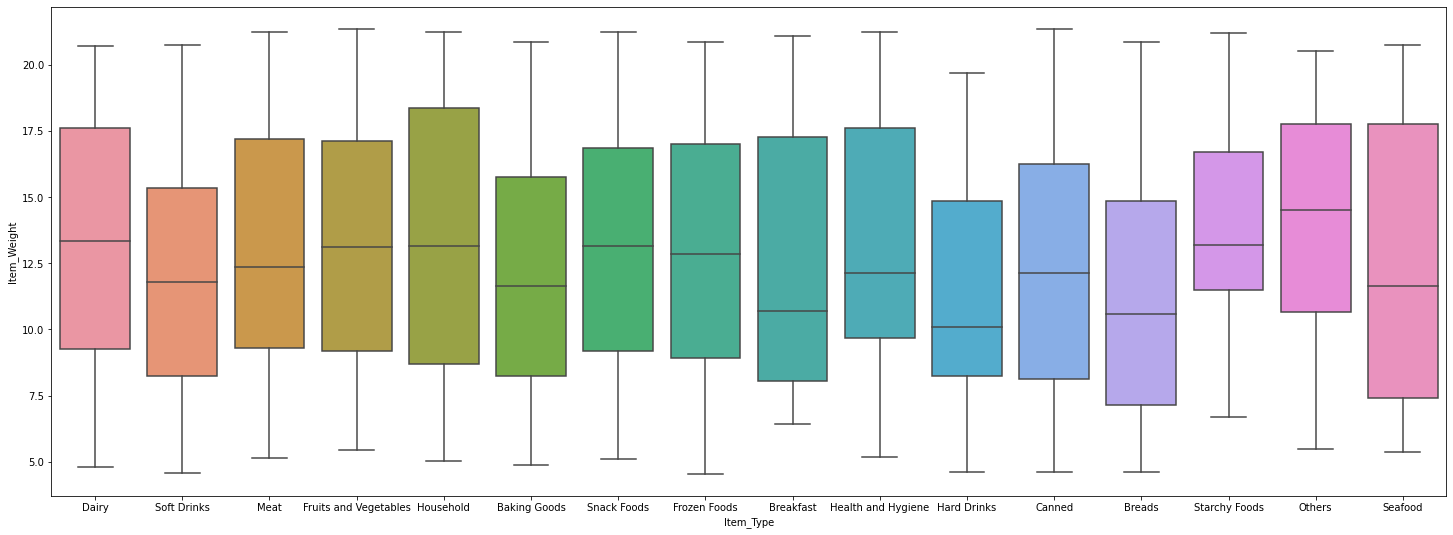

In [235]:
plt.figure(figsize = (25,9))
sns.boxplot(data = df_sales_data,x = 'Item_Type',y = 'Item_Weight')

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Weight'>

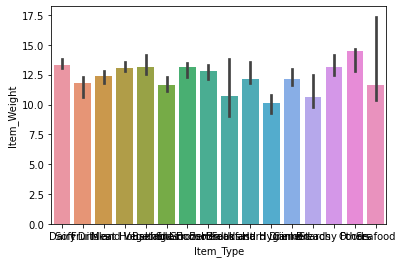

In [236]:
sns.barplot(data=df_sales_data,x='Item_Type',y='Item_Weight',estimator=np.median)

### Observing the data it looks like weight is related to Item Identifier lets explore that


In [237]:
df_sales_data[["Item_Identifier",'Item_Weight']].sort_values(by='Item_Identifier').drop_duplicates()

,Item_Identifier,Item_Weight
8043,DRA12,11.60
8195,DRA24,19.35
2879,DRA24,NaN
3927,DRA59,8.27
6179,DRA59,NaN
...,...,...
411,NCZ42,10.50
6879,NCZ53,9.60
2084,NCZ53,NaN
2839,NCZ54,14.65


### Item identifier is the decider for item weight

- There are 4 item identifiers where weight is not given
- We will map the weights for these 4 entities separately

In [238]:
unq_items_with_weight = df_sales_data[["Item_Identifier",'Item_Weight']][~df_sales_data['Item_Weight'].isnull()].sort_values(by='Item_Identifier').drop_duplicates()

uncovered_items = [x for x in df_sales_data['Item_Identifier'] if x not in unq_items_with_weight['Item_Identifier'].unique()]
uncovered_items

['FDN52', 'FDK57', 'FDE52', 'FDQ60']

### Except for these 4 unique items other unique items have weights assigned 

In [239]:
df_sales_data[df_sales_data['Item_Identifier'].isin(['FDN52', 'FDK57', 'FDE52', 'FDQ60'])]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


### Missing value treatment:

Based on our learning let us assign `Item_Weights` using  `Item_Identifier` field except for above 4 records.<br/><br>
We will assign the weight as the median weight of all Items that have same `Identifier` which the current item belongs<br><br>
If an item has Identifier `x` which has weights missing then we will compute median of all weights that have identifier as `x` and assign it as missing value.<br><br>
For the remaining we will do separate missing value treatment

In [240]:
def treat_missing_weight1(df):
    
    
    ######################   apply median based on item Identifier  #########################################################
    for i in df['Item_Identifier'].unique():
        median_wt_of_same_itemid = df[df['Item_Identifier']== i]['Item_Weight'].median()
        
        temp = df[(df['Item_Identifier']== i) & (df['Item_Weight'].isnull())]['Item_Weight'].fillna(median_wt_of_same_itemid)
        df.loc[(df['Item_Identifier']== i) & (df['Item_Weight'].isnull()),'Item_Weight'] = temp
     
    
    
    ##################################### Apply median based on Item Type #######################################################
    for i in ['FDN52', 'FDK57', 'FDE52', 'FDQ60']:
        val = df[df['Item_Identifier']== i]['Item_Type']
        
        val1 = df.loc[(df["Item_Type"] == val.iloc[0]),'Item_Weight'].median()
        
        temp = df[df['Item_Identifier']== i]['Item_Weight'].fillna(val1)
        df.loc[df['Item_Identifier']== i,'Item_Weight'] = temp
    
    
    return df

In [241]:
df_sales_data = treat_missing_weight1(df_sales_data)


In [242]:
df_sales_data.groupby(by=['Outlet_Location_Type','Outlet_Type','Outlet_Size']).count()
#sns.barplot(data=df_sales_data,x='Outlet_Size',y='Outlet_Size',)

Item_Identifier  \
Outlet_Location_Type Outlet_Type       Outlet_Size                    
Tier 1               Grocery Store     Small                    528   
                     Supermarket Type1 Medium                   930   
                                       Small                    930   
Tier 2               Supermarket Type1 Small                    930   
Tier 3               Supermarket Type1 High                     932   
                     Supermarket Type2 Medium                   928   
                     Supermarket Type3 Medium                   935   

                                                    Item_Weight  \
Outlet_Location_Type Outlet_Type       Outlet_Size                
Tier 1               Grocery Store     Small                528   
                     Supermarket Type1 Medium               930   
                                       Small                930   
Tier 2               Supermarket Type1 Small                930   
Tier 3               Supermarket Type1 High                 932   
                     Supermarket Type2 Medium               928   
                     Supermarket Type3 Medium               935   

                                                    Item_Fat_Content  \
Outlet_Location_Type Outlet_Type       Outlet_Size                     
Tier 1               Grocery Store     Small                     528   
                     Supermarket Type1 Medium                    930   
                                       Small                     930   
Tier 2               Supermarket Type1 Small                     930   
Tier 3               Supermarket Type1 High                      932   
                     Supermarket Type2 Medium                    928   
                     Supermarket Type3 Medium                    935   

                                                    Item_Visibility  \
Outlet_Location_Type Outlet_Type       Outlet_Size                    
Tier 1               Grocery Store     Small                    528   
                     Supermarket Type1 Medium                   930   
                                       Small                    930   
Tier 2               Supermarket Type1 Small                    930   
Tier 3               Supermarket Type1 High                     932   
                     Supermarket Type2 Medium                   928   
                     Supermarket Type3 Medium                   935   

                                                    Item_Type  Item_MRP  \
Outlet_Location_Type Outlet_Type       Outlet_Size                        
Tier 1               Grocery Store     Small              528       528   
                     Supermarket Type1 Medium             930       930   
                                       Small              930       930   
Tier 2               Supermarket Type1 Small              930       930   
Tier 3               Supermarket Type1 High               932       932   
                     Supermarket Type2 Medium             928       928   
                     Supermarket Type3 Medium             935       935   

                                                    Outlet_Identifier  \
Outlet_Location_Type Outlet_Type       Outlet_Size                      
Tier 1               Grocery Store     Small                      528   
                     Supermarket Type1 Medium                     930   
                                       Small                      930   
Tier 2               Supermarket Type1 Small                      930   
Tier 3               Supermarket Type1 High                       932   
                     Supermarket Type2 Medium                     928   
                     Supermarket Type3 Medium                     935   

                                                    Outlet_Establishment_Year  \
Outlet_Location_Type Outlet_Type       Outlet_Size                              
Tier 1               Gr

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

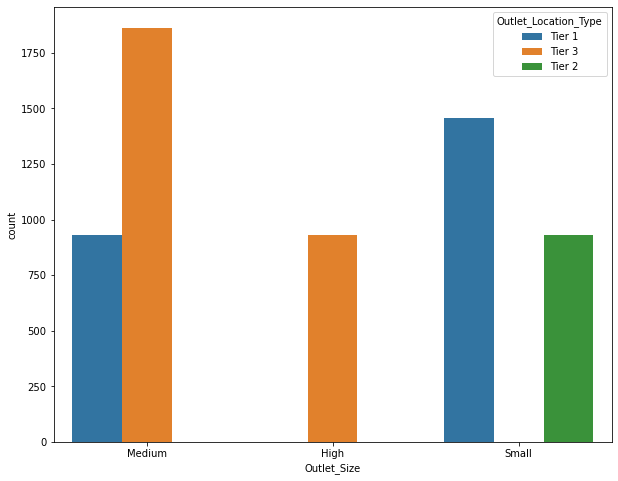

In [243]:
plt.figure(figsize=(10,8))
sns.countplot(data=df_sales_data,x='Outlet_Size',hue='Outlet_Location_Type')

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

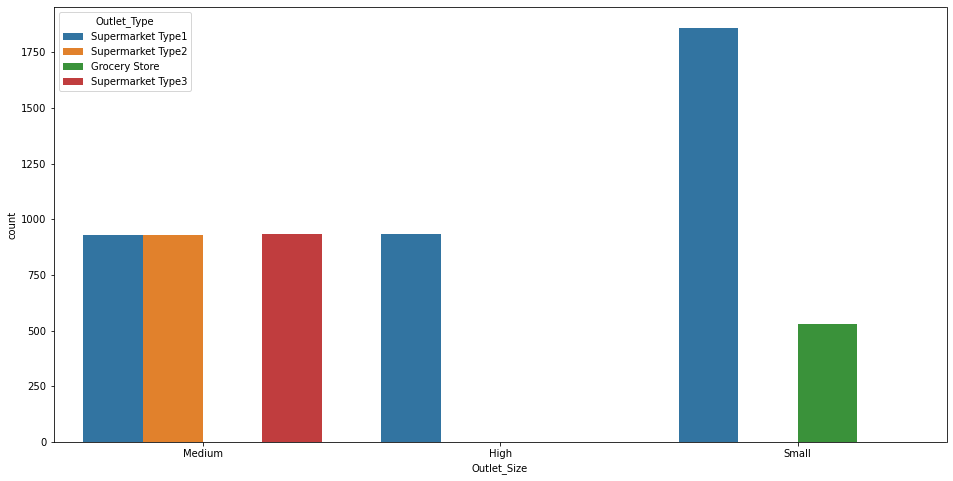

In [244]:
plt.figure(figsize=(16,8))
sns.countplot(data=df_sales_data,x='Outlet_Size',hue='Outlet_Type')

## Outlet size analysis

### Looking at the groups:
- If Grocery Store and tier1 and grocery Store its `Small`
- If Supermarket1 and tier1 it can be either `Medium` or `Small` we will stick with Medium
- If Tier 2 it will be small
- If tier 3 and supermarket1 its high
- If Tier 3 and supermarket 2 or Supermarket3 it is medium
- Supermarket3 and supermarket2 with tier 3 will have medium outlet size


### Using this conclusion we will impute missing values


In [245]:
def impute_outlet_size(df):
    df.loc[df['Outlet_Type'] == 'Grocery Store',"Outlet_Size"] = 'Small'
    df.loc[df['Outlet_Location_Type'] == 'Tier 2',"Outlet_Size"] = 'Small'
    df.loc[df['Outlet_Location_Type'] == 'Tier 2',"Outlet_Size"] = 'Small'
    df.loc[(df['Outlet_Location_Type'] == 'Tier 3') & (df['Outlet_Type'] == 'Supermarket Type1'),'Outlet_Size'] = 'High'
    df.loc[(df['Outlet_Location_Type'] == 'Tier 3') & ((df['Outlet_Type'] == 'Supermarket Type2') | (df['Outlet_Type'] == 'Supermarket Type3')),'Outlet_Size'] = 'Medium'
    df.loc[(df['Outlet_Location_Type'] == 'Tier 1') & (df['Outlet_Type'] == 'Supermarket Type1'),"Outlet_Size"] = 'Medium'
    
    return df
    

In [246]:
df_sales_data = impute_outlet_size(df_sales_data)

In [247]:
df_sales_data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3        Small
4         High
         ...  
8518      High
8519     Small
8520     Small
8521    Medium
8522    Medium
Name: Outlet_Size, Length: 8523, dtype: object

## Nulls removed for Outlet size

In [248]:
df_sales_data.groupby(by=['Outlet_Location_Type','Outlet_Type','Outlet_Size']).count()

Item_Identifier  \
Outlet_Location_Type Outlet_Type       Outlet_Size                    
Tier 1               Grocery Store     Small                    528   
                     Supermarket Type1 Medium                  1860   
Tier 2               Supermarket Type1 Small                   2785   
Tier 3               Grocery Store     Small                    555   
                     Supermarket Type1 High                     932   
                     Supermarket Type2 Medium                   928   
                     Supermarket Type3 Medium                   935   

                                                    Item_Weight  \
Outlet_Location_Type Outlet_Type       Outlet_Size                
Tier 1               Grocery Store     Small                528   
                     Supermarket Type1 Medium              1860   
Tier 2               Supermarket Type1 Small               2785   
Tier 3               Grocery Store     Small                555   
                     Supermarket Type1 High                 932   
                     Supermarket Type2 Medium               928   
                     Supermarket Type3 Medium               935   

                                                    Item_Fat_Content  \
Outlet_Location_Type Outlet_Type       Outlet_Size                     
Tier 1               Grocery Store     Small                     528   
                     Supermarket Type1 Medium                   1860   
Tier 2               Supermarket Type1 Small                    2785   
Tier 3               Grocery Store     Small                     555   
                     Supermarket Type1 High                      932   
                     Supermarket Type2 Medium                    928   
                     Supermarket Type3 Medium                    935   

                                                    Item_Visibility  \
Outlet_Location_Type Outlet_Type       Outlet_Size                    
Tier 1               Grocery Store     Small                    528   
                     Supermarket Type1 Medium                  1860   
Tier 2               Supermarket Type1 Small                   2785   
Tier 3               Grocery Store     Small                    555   
                     Supermarket Type1 High                     932   
                     Supermarket Type2 Medium                   928   
                     Supermarket Type3 Medium                   935   

                                                    Item_Type  Item_MRP  \
Outlet_Location_Type Outlet_Type       Outlet_Size                        
Tier 1               Grocery Store     Small              528       528   
                     Supermarket Type1 Medium            1860      1860   
Tier 2               Supermarket Type1 Small             2785      2785   
Tier 3               Grocery Store     Small              555       555   
                     Supermarket Type1 High               932       932   
                     Supermarket Type2 Medium             928       928   
                     Supermarket Type3 Medium             935       935   

                                                    Outlet_Identifier  \
Outlet_Location_Type Outlet_Type       Outlet_Size                      
Tier 1               Grocery Store     Small                      528   
                     Supermarket Type1 Medium                    1860   
Tier 2               Supermarket Type1 Small                     2785   
Tier 3               Grocery Store     Small                      555   
                     Supermarket Type1 High                       932   
                     Supermarket Type2 Medium                     928   
                     Supermarket Type3 Medium                     935   

                                                    Outlet_Establishment_Year  \
Outlet_Location_Type Outlet_Type       Outlet_Size                              
Tier 1               Gr

### Now let us check the missing values again

In [249]:
for col in df_sales_data.columns:
    percentage_missing = 100*df_sales_data[col].isnull().sum()/df_sales_data.shape[0]
    print("{0} ------------------- {1}%".format(col,percentage_missing))

Item_Identifier ------------------- 0.0%
Item_Weight ------------------- 0.0%
Item_Fat_Content ------------------- 0.0%
Item_Visibility ------------------- 0.0%
Item_Type ------------------- 0.0%
Item_MRP ------------------- 0.0%
Outlet_Identifier ------------------- 0.0%
Outlet_Establishment_Year ------------------- 0.0%
Outlet_Size ------------------- 0.0%
Outlet_Location_Type ------------------- 0.0%
Outlet_Type ------------------- 0.0%
Item_Outlet_Sales ------------------- 0.0%


C:\Users\H380331\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

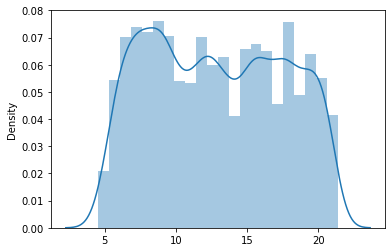

In [250]:
sns.distplot(x=df_sales_data['Item_Weight'])

In [251]:
df_sales_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

### Let us clean fat content

In [252]:
def clean_fatcontent(df):
    df['Item_Fat_Content'] = df['Item_Fat_Content'].apply(lambda x: x.lower())
    df['Item_Fat_Content'] = df['Item_Fat_Content'].apply(lambda x: 'regular' if x == 'reg' else x)
    df['Item_Fat_Content'] = df['Item_Fat_Content'].apply(lambda x: 'low fat' if x == 'lf' else x)
    return df

In [253]:
df_sales_data = clean_fatcontent(df_sales_data)

df_sales_data['Item_Fat_Content'].value_counts()

low fat    5517
regular    3006
Name: Item_Fat_Content, dtype: int64

### Data is clean we are all set for model building

- Let us do EDA First

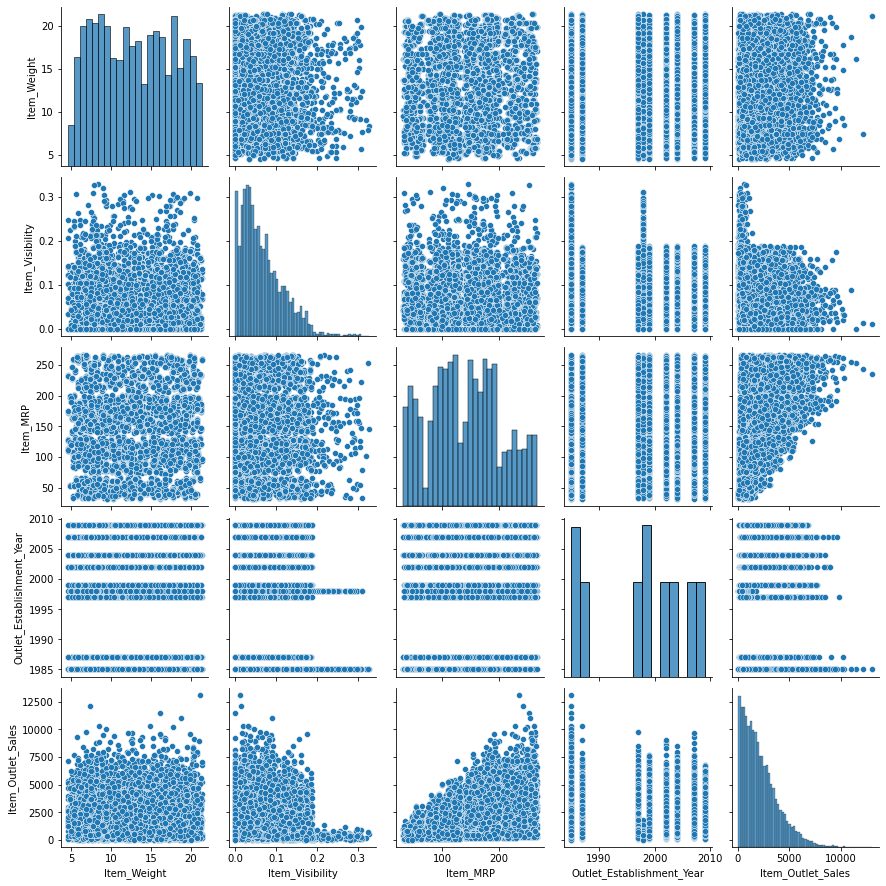

In [254]:
sns.pairplot(data=df_sales_data)

### Let us see the median of outlet sales by MRP


Text(0, 0.5, 'Outlet_Sales')

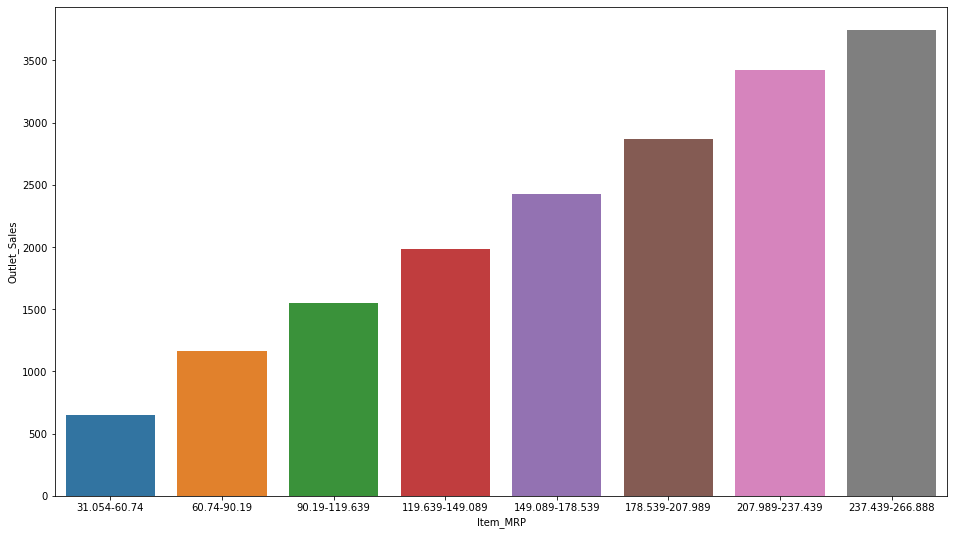

In [255]:
bins = pd.cut(x=df_sales_data['Item_MRP'],bins=8)
bins = bins.apply(lambda x: str(x))

bins = bins.apply(lambda x: x.replace("(",""))
bins = bins.apply(lambda x: x.replace("]",""))
bins = bins.apply(lambda x: x.replace(", ","-"))
bins

median_price = []
for x in bins:
    lower_limit,higher_limit = x.split('-')
    lower_limit = float(lower_limit)
    higher_limit = float(higher_limit)
    median = df_sales_data[(df_sales_data['Item_MRP'] > lower_limit) & (df_sales_data['Item_MRP'] <= higher_limit)]['Item_Outlet_Sales'].median()
    median_price.append(median)

plt.figure(figsize=(16,9))
sns.barplot(x=bins,y=median_price)
plt.xlabel("Item_MRP")
plt.ylabel("Outlet_Sales")

### Let us analyze Item category and Item visibility Trend.  Box plot will give better intution here

We will first observe the product category distribution

C:\Users\H380331\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

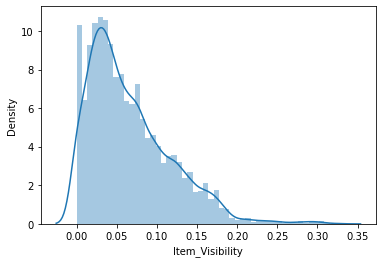

In [256]:
sns.distplot(df_sales_data['Item_Visibility'])
#sns.barplot(x=)

#### Data is skewed here

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Visibility'>

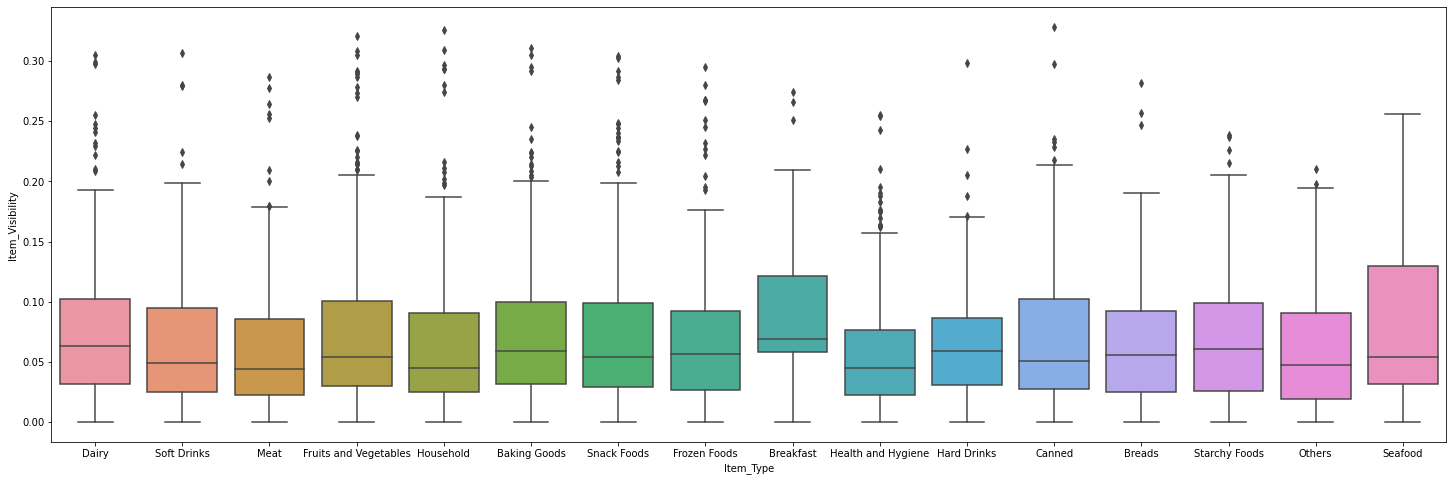

In [257]:
plt.figure(figsize=(25,8))
sns.boxplot(data=df_sales_data,x='Item_Type',y='Item_Visibility')

## Average sales per year

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

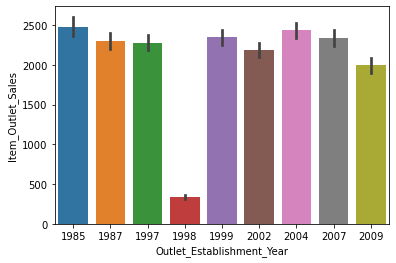

In [258]:
sns.barplot(data=df_sales_data,x='Outlet_Establishment_Year',y='Item_Outlet_Sales',estimator=np.mean)

### The outlets eshablished in 1998 are suffering in sales

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

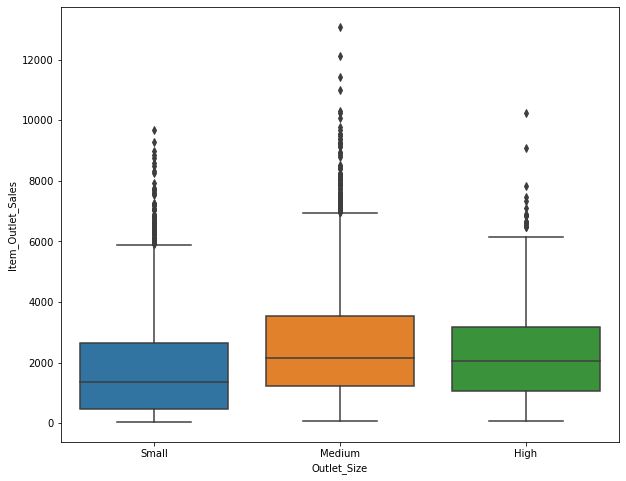

In [259]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_sales_data,x='Outlet_Size',y='Item_Outlet_Sales',order=['Small','Medium','High'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

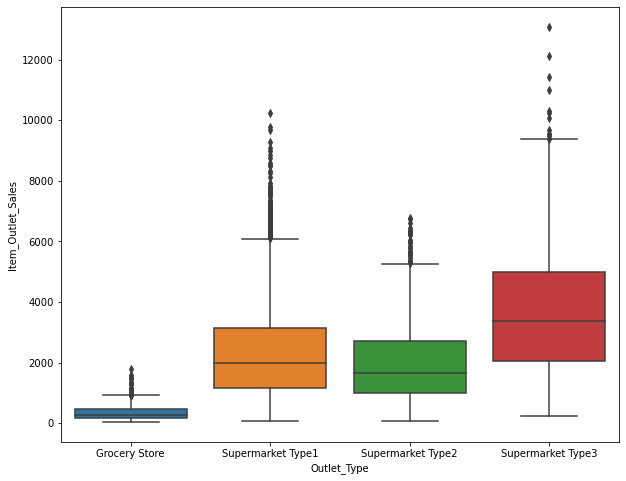

In [260]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_sales_data,x='Outlet_Type',y='Item_Outlet_Sales',order=['Grocery Store','Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

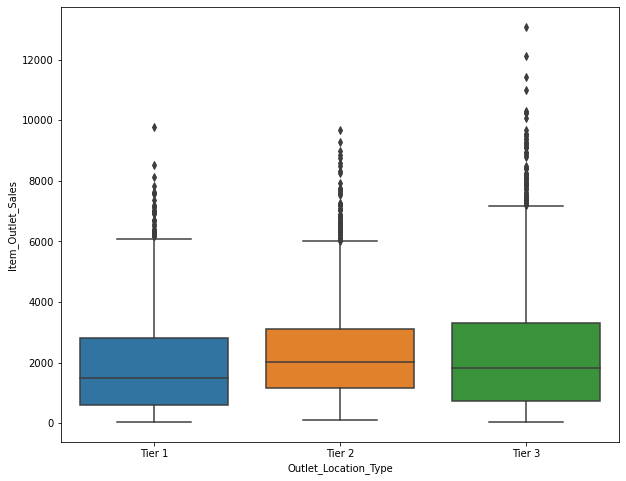

In [261]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_sales_data,x='Outlet_Location_Type',y='Item_Outlet_Sales',order=['Tier 1', 'Tier 2', 'Tier 3'])

## Let us identify the average sales based on categorical variables

- We will identify the categorical columns 
- We will plot box plot for such columns

In [262]:
def get_categorical_cols(df):
    cols = df.columns
    cat_col = []
    for col in cols:
        try:
            df[col].apply(lambda x: float(x))
        except(ValueError):
            cat_col.append(col)
    return cat_col

In [263]:
cat_cols = get_categorical_cols(df_sales_data)
cat_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

### Let us Start creating one hot encoded features and create dataset


In [264]:
get_unique_count(df_sales_data)

{'Item_Identifier': 1559,
 'Item_Weight': 415,
 'Item_Fat_Content': 2,
 'Item_Visibility': 7880,
 'Item_Type': 16,
 'Item_MRP': 5938,
 'Outlet_Identifier': 10,
 'Outlet_Establishment_Year': 9,
 'Outlet_Size': 3,
 'Outlet_Location_Type': 3,
 'Outlet_Type': 4,
 'Item_Outlet_Sales': 3493}

### We will drop Item Identifier It will create a huge sparse encoded vectors. The Dimentionality will be very high. 

In [265]:
def generate_values(df):
    columns = ['Item_Fat_Content','Item_Type','Outlet_Identifier', 'Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Establishment_Year']
    ids = df.pop('Item_Identifier')
    for col in columns:
        dummy = pd.get_dummies(df[col],drop_first=True)
        df = pd.concat([df,dummy],axis=1)
    df = df.drop(columns,axis=1)
    return df,ids
    

In [266]:
df_sales_data['Item_Identifier'] =1 
df_sales_data,identifiers = generate_values(df_sales_data)

In [268]:
df_sales_data.columns

Index([          'Item_Weight',       'Item_Visibility',
                    'Item_MRP',     'Item_Outlet_Sales',
                     'regular',                'Breads',
                   'Breakfast',                'Canned',
                       'Dairy',          'Frozen Foods',
       'Fruits and Vegetables',           'Hard Drinks',
          'Health and Hygiene',             'Household',
                        'Meat',                'Others',
                     'Seafood',           'Snack Foods',
                 'Soft Drinks',         'Starchy Foods',
                      'OUT013',                'OUT017',
                      'OUT018',                'OUT019',
                      'OUT027',                'OUT035',
                      'OUT045',                'OUT046',
                      'OUT049',                'Medium',
                       'Small',                'Tier 2',
                      'Tier 3',     'Supermarket Type1',
           'Supermarket Type2',

### Now its time to start model building
- We will build a linear regression 


### Importing necessary libraries

In [272]:
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score


### Splitting

In [283]:
output = df_sales_data.pop('Item_Outlet_Sales')
X_train,X_test,y_train,y_test = train_test_split(df_sales_data,output ,train_size = 0.7,random_state = 60)
                                                 

### Preprocess the data min max scaling and then performing linear regression


In [288]:
sc = MinMaxScaler()
X_train[X_train.columns] = sc.fit_transform(X_train)
sc_y = MinMaxScaler()
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1))

In [291]:
def apply_transformations(xtest,ytest,scalex = sc, scaley=sc_y):
    xtest[xtest.columns] = scalex.transform(xtest)
    ytest = scaley.transform(np.array(ytest).reshape(-1,1))
    return xtest,ytest

In [292]:
X_test,y_test = apply_transformations(X_test,y_test)

<ipython-input-291-a23075181161>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest[xtest.columns] = scalex.transform(xtest)
C:\Users\H380331\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [299]:
from sklearn.feature_selection import RFE

In [331]:
X_train_linear = X_train.copy()
y_train_linear = y_train.copy()

In [333]:
rfe = RFE(estimator=LinearRegression(),n_features_to_select=30)
print(rfe)
features = rfe.fit(X_train_linear,y_train_linear).fit(X_train_linear,y_train_linear)
cols = X_train_linear.columns[features.support_]
X_train_linear = X_train_linear[cols]

RFE(estimator=LinearRegression(), n_features_to_select=30)


In [334]:
X_train_linear = sm.add_constant(X_train_linear)


In [335]:
lm0 = sm.OLS(y_train.reshape(-1),X_train_linear).fit()
lm0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     495.6
Date:                Thu, 27 May 2021   Prob (F-statistic):               0.00
Time:                        19:22:40   Log-Likelihood:                 6115.7
No. Observations:                5966   AIC:                        -1.220e+04
Df Residuals:                    5950   BIC:                        -1.209e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.024e+10   1.38e+11     -0.291      0.771   -3.11e+11    2.31e+11
Item_MRP              0.2806      0.004     65.786      0.000       0.272       0.289
regular               0.0038      0.002      1.522      0.128      -0.001       0.009
Breakfast             0.0064      0.010      0.652      0.514      -0.013       0.026
Hard Drinks           0.0043      0.007      0.597      0.550      -0.010       0.018
Household            -0.0040      0.004     -1.035      0.301      -0.011       0.004
Seafood               0.0068      0.013      0.527      0.598      -0.018       0.032
OUT013            -1.837e+10   6.31e+10     -0.291      0.771   -1.42e+11    1.05e+11
OUT017            -6.999e+09   2.41e+10     -0.291      0.771   -5.42e+10    4.02e+10
OUT018              7.18e+09   2.47e+10      0.291      0.771   -4.12e+10    5.56e+10
OUT019             1.017e+10   3.49e+10      0.291      0.771   -5.83e+10    7.87e+10
OUT027             7.203e+09   2.48e+10      0.291      0.771   -4.13e+10    5.57e+10
OUT035            -1.072e+10   3.68e+10     -0.291      0.771   -8.29e+10    6.15e+10
OUT045             -1.07e+10   3.68e+10     -0.291      0.771   -8.28e+10    6.14e+10
OUT046            -1.985e+10   6.82e+10     -0.291      0.771   -1.54e+11    1.14e+11
OUT049            -1.986e+10   6.83e+10     -0.291      0.771   -1.54e+11    1.14e+11
Medium             1.438e+10   4.94e+10      0.291      0.771   -8.25e+10    1.11e+11
Small              3.007e+10   1.03e+11      0.291      0.771   -1.73e+11    2.33e+11
Tier 2            -3.396e+10   1.17e+11     -0.291      0.771   -2.63e+11    1.95e+11
Tier 3             1.142e+10   3.92e+10      0.291      0.771   -6.55e+10    8.84e+10
Supermarket Type1  6.555e+10   2.25e+11      0.291      0.771   -3.76e+11    5.07e+11
Supermarket Type2  6.868e+09   2.36e+10      0.291      0.771   -3.94e+10    5.32e+10
Supermarket Type3  7.231e+09   2.49e+10      0.291      0.771   -4.15e+10     5.6e+10
1987              -1.837e+10   6.31e+10     -0.291      0.771   -1.42e+11    1.05e+11
1997              -1.984e+10   6.82e+10     -0.291      0.771   -1.54e+11    1.14e+11
1998              -1.251e+09    4.3e+09     -0.291      0.771   -9.68e+09    7.18e+09
1999              -1.984e+10   6.82e+10     -0.291      0.771   -1.54e+11    1.14e+11
2002              -1.072e+10   3.69e+10     -0.291      0.771    -8.3e+10    6.15e+10
2004              -1.071e+10   3.68e+10     -0.291      0.771   -8.29e+10    6.15e+10
2007              -1.443e+10   4.96e+10     -0.291      0.771   -1.12e+11    8.28e+10
2009               3.859e+08   1.33e+09      0.291      0.771   -2.21e+09    2.99e+09
==============================================================================
Omnibus:                      692.374   Durbin-Watson:                   2.004
P

In [336]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [337]:
def Vif(x):
    res = pd.DataFrame()
    res['Cols'] = x.columns
    res['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
    return res

In [338]:
Vif(X_train_linear)

C:\Users\H380331\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\H380331\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Cols,VIF
0,const,0.000000e+00
1,Item_MRP,1.000711e+00
2,regular,1.093978e+00
3,Breakfast,1.005842e+00
4,Hard Drinks,1.024468e+00
5,Household,1.081569e+00
6,Seafood,1.002235e+00
7,OUT013,7.434480e+09
8,OUT017,3.757344e+08
9,OUT018,2.466997e+09


In [339]:
X_train_linear = X_train_linear.drop('Supermarket Type1',axis = 1)
Vif(X_train_linear)

C:\Users\H380331\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\H380331\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Cols,VIF
0,const,0.000000
1,Item_MRP,1.001353
2,regular,1.094306
3,Breakfast,1.005846
4,Hard Drinks,1.024468
5,Household,1.081570
6,Seafood,1.002239
7,OUT013,inf
8,OUT017,inf
9,OUT018,inf


In [341]:
X_train_linear = X_train_linear.drop(['Supermarket Type2','Supermarket Type3'],axis = 1)
Vif(X_train_linear)

C:\Users\H380331\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\H380331\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Cols,VIF
0,const,0.000000
1,Item_MRP,1.001199
2,regular,1.094306
3,Breakfast,1.005846
4,Hard Drinks,1.024468
5,Household,1.081570
6,Seafood,1.002239
7,OUT013,inf
8,OUT017,inf
9,OUT018,inf


## Removed high vif coeficients

In [343]:
X_train_linear = X_train_linear.drop(X_train_linear.columns[7:],axis = 1)
Vif(X_train_linear)

,Cols,VIF
0,const,4.983695
1,Item_MRP,1.001326
2,regular,1.092403
3,Breakfast,1.005195
4,Hard Drinks,1.023460
5,Household,1.079409
6,Seafood,1.001447


In [344]:
lm1 = sm.OLS(y_train.reshape(-1),X_train_linear).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     478.0
Date:                Thu, 27 May 2021   Prob (F-statistic):               0.00
Time:                        19:33:34   Log-Likelihood:                 4869.6
No. Observations:                5966   AIC:                            -9725.
Df Residuals:                    5959   BIC:                            -9678.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0324      0.003     10.473      0.000       0.026       0.038
Item_MRP        0.2809      0.005     53.510      0.000       0.271       0.291
regular         0.0051      0.003      1.666      0.096      -0.001       0.011
Breakfast       0.0024      0.012      0.195      0.845      -0.021       0.026
Hard Drinks     0.0067      0.009      0.767      0.443      -0.010       0.024
Household      -0.0064      0.005     -1.364      0.173      -0.016       0.003
Seafood         0.0052      0.016      0.330      0.741      -0.026       0.036
==============================================================================
Omnibus:                      538.252   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1169.146
Skew:                           0.573   Prob(JB):                    1.33e-254
Kurtosis:                       4.842   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear models are not suitable for this data set Even Vanilla linear regression has not performed
- High vif and multicolinearity 
- High p values
- Low r squared
- Even regularized linear models dont suit 


## Solution 2 Decision tree

### Tree models are can work even after skipping scaling , Standardization, normalization

In [553]:
##

In [554]:
df_sales_data = pd.read_csv("train_v9rqX0R.csv")
output = df_sales_data.pop('Item_Outlet_Sales')





### Cleaning process

In [555]:
df_sales_data = impute_outlet_size(df_sales_data)
df_sales_data = treat_missing_weight1(df_sales_data)
df_sales_data = clean_fatcontent(df_sales_data)
       

### One hot encoding and split

In [556]:
df_sales_data,identifier = generate_values(df_sales_data)

X_train,X_test,y_train,y_test = train_test_split(df_sales_data,output ,train_size = 0.7,random_state = 60)

In [557]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor


In [558]:
X_train_tree = X_train
y_train_tree = y_train

### Let us try fitting decision tree classification

In [559]:
dt = DecisionTreeRegressor(random_state=20)
dt = dt.fit(X_train_tree,y_train_tree)

## So many features present in the tree hence not plotting it

In [560]:
pd.DataFrame({'Columns': X_train_tree.columns,'FeatureImportance': dt.feature_importances_})

,Columns,FeatureImportance
0,Item_Weight,0.077255
1,Item_Visibility,0.102559
2,Item_MRP,0.431589
3,regular,0.008531
4,Breads,0.002165
5,Breakfast,0.002849
6,Canned,0.002981
7,Dairy,0.007166
8,Frozen Foods,0.006376
9,Fruits and Vegetables,0.006765


In [561]:
from sklearn.metrics import r2_score

y_train_pred = dt.predict(X_train_tree)

y_test_pred = dt.predict(X_test)

print("Train score", r2_score(y_train_tree,y_train_pred))
print("Test score", r2_score(y_test,y_test_pred))

Train score 1.0
Test score 0.18685785373429942


### The fully grown tree has memorized everything. Fully overfitted

## Plotting the tree is very expensive

Let us do HPT

In [562]:
params = {
    'max_depth' : [10,20],
    'min_samples_split': [10,30,50,100],
    'max_features': [10,20,30]
    
}


grid = GridSearchCV(param_grid=params,estimator=DecisionTreeRegressor(random_state=20),scoring='neg_mean_squared_error',cv=5,n_jobs=-1).fit(X_train_tree,y_train_tree)

In [563]:
tree_tuned = grid.best_estimator_.fit(X_train_tree,y_train)

In [564]:
y_train_pred = tree_tuned.predict(X_train_tree)
y_test_pred = tree_tuned.predict(X_test)

print("train score {0}".format(r2_score(y_train_tree,y_train_pred)))
print("test score {0}".format(r2_score(y_test,y_test_pred)))

train score 0.6092093576360552
test score 0.5849110653001287


In [565]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=10, max_features=20, min_samples_split=100,
                      random_state=20)

### We will have to try random forest

In [566]:
X_train_forest = X_train.copy()
y_train_forest = y_train.copy()

In [567]:
params = {
    'max_depth' : [10,20,30],
    'min_samples_split': [10,30,50,100],
    'max_features': [10,20,30],
    'n_estimators': [100,200]
}
grid = GridSearchCV(estimator= RandomForestRegressor(random_state=3,oob_score=True),param_grid=params,cv = 5,scoring='neg_mean_squared_error',n_jobs=-1).fit(X_train_forest,y_train_forest)

In [568]:
rf = grid.best_estimator_.fit(X_train_forest,y_train_forest)
y_train_pred = rf.predict(X_train_forest)
print("train score {0}".format(r2_score(y_train_forest,y_train_pred)))

train score 0.6291315076252786


In [569]:
rf_final = grid.best_estimator_
rf_final

RandomForestRegressor(max_depth=10, max_features=30, min_samples_split=100,
                      n_estimators=200, oob_score=True, random_state=3)

In [570]:
y_test_pred = rf.predict(X_test)
print("test score {0}".format(r2_score(y_test,y_test_pred)))

test score 0.6254390641936536


### Lets finalize random forest  for now as it is consistent for train and test without overfitting

## Apply model on test data

In [608]:
df_test = pd.read_csv('test_AbJTz2l.csv')

In [609]:
df_test.isnull().sum()


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Cleaning the test data based on training

In [610]:
df_test = impute_outlet_size(df_test)
df_test = treat_missing_weight1(df_test)
df_test = clean_fatcontent(df_test)
                          

In [611]:
df_test.isnull().sum()

Item_Identifier               0
Item_Weight                  20
Item_Fat_Content              0
Item_Visibility               0
Item_Type                     0
Item_MRP                      0
Outlet_Identifier             0
Outlet_Establishment_Year     0
Outlet_Size                   0
Outlet_Location_Type          0
Outlet_Type                   0
dtype: int64

### still 20 rows are not clean we will put the median weight. We could have done eda but as this is test data we dont want to see it

In [612]:
df_test.loc[df_test['Item_Weight'].isnull(),'Item_Weight'] = df_test['Item_Weight'].median()

### One hot encoding

In [613]:
df_test,identifier = generate_values(df_test)

In [614]:
df_test.shape


(5681, 43)

In [615]:
df_test.isnull().sum()


Item_Weight              0
Item_Visibility          0
Item_MRP                 0
regular                  0
Breads                   0
Breakfast                0
Canned                   0
Dairy                    0
Frozen Foods             0
Fruits and Vegetables    0
Hard Drinks              0
Health and Hygiene       0
Household                0
Meat                     0
Others                   0
Seafood                  0
Snack Foods              0
Soft Drinks              0
Starchy Foods            0
OUT013                   0
OUT017                   0
OUT018                   0
OUT019                   0
OUT027                   0
OUT035                   0
OUT045                   0
OUT046                   0
OUT049                   0
Medium                   0
Small                    0
Tier 2                   0
Tier 3                   0
Supermarket Type1        0
Supermarket Type2        0
Supermarket Type3        0
1987                     0
1997                     0
1

## Great we are good to make predictions

In [616]:
predictions = rf_final.predict(df_test)
predictions

array([1715.17857864, 1383.44740266,  508.04243767, ..., 1824.3603253 ,
       3744.39821554, 1378.04368334])

### Submission file

In [617]:
df = pd.read_csv('test_AbJTz2l.csv')

submission = df[['Item_Identifier','Outlet_Identifier']]

submission['Item_Outlet_Sales'] = predictions



<ipython-input-617-35618544f717>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Item_Outlet_Sales'] = predictions


In [619]:
submission.to_csv("pani.csv")

In [624]:
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1715.178579
1,FDW14,OUT017,1383.447403
2,NCN55,OUT010,508.042438
3,FDQ58,OUT017,2480.143616
4,FDY38,OUT027,5917.033047
...,...,...,...
5676,FDB58,OUT046,2264.865241
5677,FDD47,OUT018,2559.528836
5678,NCO17,OUT045,1824.360325
5679,FDJ26,OUT017,3744.398216


#### Seeing the sample submission as its practice data set

In [621]:
s = pd.read_csv('my_submission.csv')
r2_score(s['Item_Outlet_Sales'],submission['Item_Outlet_Sales'])

0.811137170361929

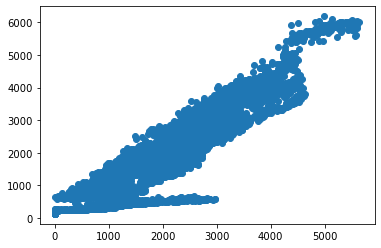

In [623]:
plt.scatter(s['Item_Outlet_Sales'],submission['Item_Outlet_Sales'])